# Datasets

### Salary
### Seniority
### Work Arrangements

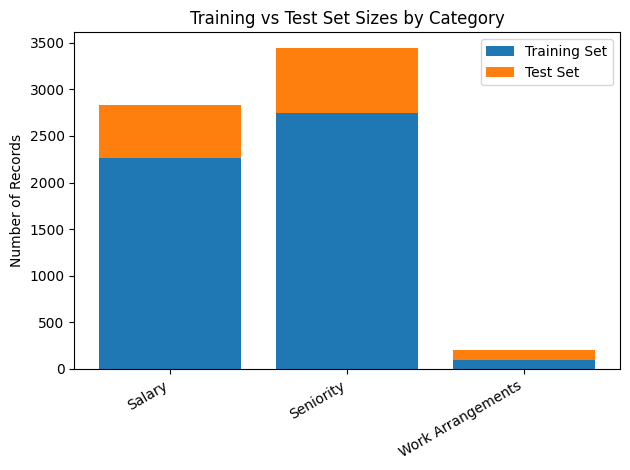

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define file paths (update these names if your files are named differently)
files = {
    'Salary': ('..\data\salary_labelled_development_set.csv', '..\data\salary_labelled_test_set.csv'),
    'Seniority': ('..\data\seniority_labelled_development_set.csv', '..\data\seniority_labelled_test_set.csv'),
    'Work Arrangements': ('..\data\work_arrangements_development_set.csv', '..\data\work_arrangements_test_set.csv')
}

# Count rows in each file
categories = []
train_counts = []
test_counts = []

for category, (train_path, test_path) in files.items():
    df_train = pd.read_csv(train_path)
    df_test = pd.read_csv(test_path)
    categories.append(category)
    train_counts.append(len(df_train))
    test_counts.append(len(df_test))

# Plot a stacked bar chart
fig, ax = plt.subplots()
ax.bar(categories, train_counts, label='Training Set')
ax.bar(categories, test_counts, bottom=train_counts, label='Test Set')

ax.set_ylabel('Number of Records')
ax.set_title('Training vs Test Set Sizes by Category')
ax.legend()

plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

# Number of Entries in each Dataset

### work arranegements dataset is significantly smaller than rest with only 99 entries (minimal required for finetuning)

In [ ]:
import pandas as pd
from pathlib import Path

# Define your files
files = {
    'Salary (Train)': Path('..') / 'data' / 'salary_labelled_development_set.csv',
    'Salary (Test)':  Path('..') / 'data' / 'salary_labelled_test_set.csv',
    'Seniority (Train)': Path('..') / 'data' / 'seniority_labelled_development_set.csv',
    'Seniority (Test)':  Path('..') / 'data' / 'seniority_labelled_test_set.csv',
    'Work Arrangements (Train)': Path('..') / 'data' / 'work_arrangements_development_set.csv',
    'Work Arrangements (Test)':  Path('..') / 'data' / 'work_arrangements_test_set.csv',
}

# Print row‐counts
for label, filepath in files.items():
    try:
        df = pd.read_csv(filepath)
        print(f"{label}: {df.shape[0]} rows")
    except FileNotFoundError:
        print(f"❌ {label}: File not found at {filepath}")


Salary (Train): 2267 rows
Salary (Test): 567 rows
Seniority (Train): 2752 rows
Seniority (Test): 689 rows
Work Arrangements (Train): 99 rows
Work Arrangements (Test): 99 rows


# Fields in the each of the datasets

In [ ]:
import pandas as pd

# paths to your three CSVs
paths = {
    "Salary":               r"..\data\salary_labelled_development_set.csv",
    "Seniority":            r"..\data\seniority_labelled_development_set.csv",
    "Work Arrangements":    r"..\data\work_arrangements_development_set.csv"
}

# read only the header row (no data) to get column names
cols = {name: list(pd.read_csv(path, nrows=0).columns)
        for name, path in paths.items()}

# pad shorter lists so we can make a rectangular DataFrame
max_len = max(len(v) for v in cols.values())
for v in cols.values():
    v += [""] * (max_len - len(v))

# build and print as markdown
df = pd.DataFrame(cols)
print(df.to_markdown(index=False))


| Salary                 | Seniority              | Work Arrangements   |
|:-----------------------|:-----------------------|:--------------------|
| job_id                 | job_id                 | id                  |
| job_title              | job_title              | job_ad              |
| job_ad_details         | job_summary            | y_true              |
| nation_short_desc      | job_ad_details         |                     |
| salary_additional_text | classification_name    |                     |
| y_true                 | subclassification_name |                     |
|                        | y_true                 |                     |


# Non English entries

### Only Salary has non english entries - 433 in training and 109 in test. (Since we use multilingual llms, we leave these non-english entries just as it is.)

In [ ]:
import pandas as pd
from langdetect import DetectorFactory, detect

# Ensure deterministic results
DetectorFactory.seed = 0

# Paths to your three development (training) CSVs
files = {
    "Salary": "../data/salary_labelled_development_set.csv",
    "Seniority": "../data/seniority_labelled_development_set.csv",
    "Work Arrangements": "../data/work_arrangements_development_set.csv"
}

def count_non_english_rows(path, text_columns=None):
    """
    Counts the number of rows in the CSV at `path` where the combined text
    of `text_columns` is detected as non-English.
    If text_columns=None, all object-dtype columns are used.
    """
    df = pd.read_csv(path)
    if text_columns is None:
        text_columns = df.select_dtypes(include=["object"]).columns.tolist()
    non_en_count = 0

    # Combine all text columns into one string per row
    combined = df[text_columns].astype(str).agg(" ".join, axis=1)
    for text in combined:
        try:
            if detect(text) != "en":
                non_en_count += 1
        except:
            # If detection fails, count as non-English
            non_en_count += 1

    return non_en_count

# Run and print results
for label, path in files.items():
    count = count_non_english_rows(path)
    print(f"{label}: {count} non-English rows")


Salary: 433 non-English rows
Seniority: 0 non-English rows
Work Arrangements: 0 non-English rows


In [ ]:
import pandas as pd
from langdetect import DetectorFactory, detect

# Ensure deterministic results
DetectorFactory.seed = 0

# Paths to your three development (training) CSVs
files = {
    "Salary": "../data/salary_labelled_test_set.csv",
    "Seniority": "../data/seniority_labelled_test_set.csv",
    "Work Arrangements": "../data/work_arrangements_test_set.csv"
}

def count_non_english_rows(path, text_columns=None):
    """
    Counts the number of rows in the CSV at `path` where the combined text
    of `text_columns` is detected as non-English.
    If text_columns=None, all object-dtype columns are used.
    """
    df = pd.read_csv(path)
    if text_columns is None:
        text_columns = df.select_dtypes(include=["object"]).columns.tolist()
    non_en_count = 0

    # Combine all text columns into one string per row
    combined = df[text_columns].astype(str).agg(" ".join, axis=1)
    for text in combined:
        try:
            if detect(text) != "en":
                non_en_count += 1
        except:
            # If detection fails, count as non-English
            non_en_count += 1

    return non_en_count

# Run and print results
for label, path in files.items():
    count = count_non_english_rows(path)
    print(f"{label}: {count} non-English rows")

Salary: 109 non-English rows
Seniority: 0 non-English rows
Work Arrangements: 0 non-English rows


# HTML Tags
### Salary and Seniority have HTML tags in job_ad_details column
### Work arrangements is cleaned of HTML tags in the equivalent job_ad column

In [ ]:
import pandas as pd

# configure your files and the column to check for each
datasets = {
    "Salary": {
        "path": "../data/salary_labelled_development_set.csv",
        "column": "job_ad_details"
    },
    "Seniority": {
        "path": "../data/seniority_labelled_development_set.csv",
        "column": "job_ad_details"
    },
    "Work Arrangements": {
        "path": "../data/work_arrangements_development_set.csv",
        "column": "job_ad"
    }
}

# simple HTML‐tag regex
html_tag_pattern = r"<[^>]+>"

for name, info in datasets.items():
    df = pd.read_csv(info["path"], dtype=str)  # read all as str to avoid non-string issues
    col = info["column"]

    # create a boolean mask: True if that cell contains at least one HTML tag
    has_html = df[col].fillna("").str.contains(html_tag_pattern, regex=True)

    total_rows = len(df)
    html_count = has_html.sum()

    print(f"{name}:")
    print(f"  → Total rows:       {total_rows}")
    print(f"  → Rows with HTML:   {html_count}")
    print(f"  → Percent with HTML: {html_count/total_rows:.1%}\n")


Salary:
  → Total rows:       2267
  → Rows with HTML:   2266
  → Percent with HTML: 100.0%

Seniority:
  → Total rows:       2752
  → Rows with HTML:   2752
  → Percent with HTML: 100.0%

Work Arrangements:
  → Total rows:       99
  → Rows with HTML:   0
  → Percent with HTML: 0.0%



# Diving Deeper into Salary Training Dataset
### We found 3 types of NULL entries (enrties apart from an actaul addtional context) in salary_addtional_text column.
### - 'NaN'
### - '-'
### - ''  (empty)


#### Note: For ease of acccess while demonstration we replaced the '<empty>' entry with '@@'

In [ ]:
import pandas as pd

df = pd.read_csv('..\data\salary_labelled_development_set.csv')


print("Total rows:",len(df))


condition1 = df['salary_additional_text'].isnull()
empty_values = condition1.sum()
print("Number of rows with NaN in 'salary_addtional_text':", empty_values)

condition1 = df['salary_additional_text'] == '-'
empty_values = condition1.sum()
print("Number of rows with - in 'salary_addtional_text':", empty_values)

condition1 = df['salary_additional_text'] == '@@'
empty_values = condition1.sum()
print("Number of rows with <empty> in 'salary_addtional_text':", empty_values)


empty_values = (df['y_true'] == "0-0-None-None" ).sum()
non_empty_values = (df['y_true'] != "0-0-None-None" ).sum()
print("Number of rows with 0-0-None-None in 'y_true':", empty_values)


Total rows: 2267
Number of rows with NaN in 'salary_addtional_text': 602
Number of rows with - in 'salary_addtional_text': 234
Number of rows with <empty> in 'salary_addtional_text': 692
Number of rows with 0-0-None-None in 'y_true': 950


### We observed correlations between these entries and y_true values
#### 1. For every '-' entry in salary_addtional_text there is no salary mention (y_true == 0-0-None-None).
#### 2. For every '< empty >' entry in salary_addtional_text there is always a salary mention.
#### 3. For every 'NaN' entry in salary_addtional_text there is no salary mention in 89.86% of the cases.


#### Note: We decided to consider these cases as the same and we replace all the null values with "empty" just to ensure that our model does not think that absence of salary_additional_context represents the presence of salary_mention in the job_ad. Although we observed the same pattern in the test dataset of salary, we want our model to work in real life situations where this correlation may be present.

In [ ]:
condition2 = (df['salary_additional_text'].isnull()) & (df['y_true'] != "0-0-None-None")
count2 = condition2.sum()
print("Rows with salary_additional_text as NaN but with y_true:", count2)

condition2 = (df['salary_additional_text'].isnull()) & (df['y_true'] == "0-0-None-None")
count2 = condition2.sum()
print("Rows with salary_additional_text as NaN but with no y_true:", count2)


condition3 = (df['salary_additional_text'].isnull())
count3 = condition3.sum()
print("Rows with salary_additional_text as NaN:", count3)

Rows with salary_additional_text as NaN but with y_true: 61
Rows with salary_additional_text as NaN but with no y_true: 541
Rows with salary_additional_text as NaN: 602


In [ ]:
# Count where salary_additional_text is missing, but y_true is invalid
condition2 = (df['salary_additional_text'] == '-') & (df['y_true'] != "0-0-None-None")
count2 = condition2.sum()
print("Rows with salary_additional_text  as '-' but with y_true:", count2)


condition3 = (df['salary_additional_text'] == '-')
count3 = condition3.sum()
print("Rows with no salary_additional_text as -:", count3)

condition2 = (df['salary_additional_text'] == '-') & (df['y_true'] == "0-0-None-None")
count2 = condition2.sum()
print("Rows with salary_additional_text  as '-' but no y_true:", count2)

Rows with salary_additional_text  as '-' but with y_true: 0
Rows with no salary_additional_text as -: 234
Rows with salary_additional_text  as '-' but no y_true: 234


In [ ]:
condition2 = (df['salary_additional_text'] == '@@') & (df['y_true'] != "0-0-None-None")
count2 = condition2.sum()
print("Rows with salary_additional_text  as '<empty>' but with y_true:", count2)


condition3 = (df['salary_additional_text'] == '@@')
count3 = condition3.sum()
print("Rows with no salary_additional_text as '<empty>':", count3)

condition2 = (df['salary_additional_text'] == '@@') & (df['y_true'] == "0-0-None-None")
count2 = condition2.sum()
print("Rows with salary_additional_text  as '<empty>' but no y_true:", count2)

Rows with salary_additional_text  as '<empty>' but with y_true: 692
Rows with no salary_additional_text as '<empty>': 692
Rows with salary_additional_text  as '<empty>' but no y_true: 0


### Correlation between the non NULL entries in salary_addtional_text and y_true

In [ ]:
# Count where salary_additional_text exists, but y_true is "0-0-None-None"
condition1 = ((df['salary_additional_text'].notnull()) & (df['salary_additional_text'] != '-')) & (df['y_true'] == "0-0-None-None")
count1 = condition1.sum()
print("Rows with non NULL entry in salary_additional_text but no y_true:", count1)

Rows with non NULL entry in salary_additional_text but no y_true: 175


In [ ]:
condition2 = ((df['salary_additional_text'].isnull()) | (df['salary_additional_text'] == '-') | (df['salary_additional_text'] == '@@') )  & (df['y_true'] != "0-0-None-None")
count2 = condition2.sum()
print("Rows with no salary_additional_text but with y_true:", count2)

Rows with no salary_additional_text but with y_true: 753


# Salary Test Dataset
### We observed the same patterns as in the training set

In [ ]:
import pandas as pd

df2 = pd.read_csv('..\data\salary_labelled_test_set.csv')


print("Total rows:",len(df))


condition1 = df2['salary_additional_text'].isnull()
empty_values = condition1.sum()
print("Number of rows with NaN in 'salary_addtional_text':", empty_values)

condition1 = df2['salary_additional_text'] == '-'
empty_values = condition1.sum()
print("Number of rows with - in 'salary_addtional_text':", empty_values)

condition1 = df2['salary_additional_text'] == '@@'
empty_values = condition1.sum()
print("Number of rows with <empty> in 'salary_addtional_text':", empty_values)


empty_values = (df2['y_true'] == "0-0-None-None" ).sum()
non_empty_values = (df2['y_true'] != "0-0-None-None" ).sum()
print("Number of rows with 0-0-None-None in 'y_true':", empty_values)

Total rows: 2267
Number of rows with NaN in 'salary_addtional_text': 151
Number of rows with - in 'salary_addtional_text': 62
Number of rows with <empty> in 'salary_addtional_text': 177
Number of rows with 0-0-None-None in 'y_true': 238


In [ ]:
condition2 = (df2['salary_additional_text'].isnull()) & (df2['y_true'] != "0-0-None-None")
count2 = condition2.sum()
print("Rows with salary_additional_text as NaN but with y_true:", count2)

condition2 = (df2['salary_additional_text'].isnull()) & (df2['y_true'] == "0-0-None-None")
count2 = condition2.sum()
print("Rows with salary_additional_text as NaN but with no y_true:", count2)


condition3 = (df2['salary_additional_text'].isnull())
count3 = condition3.sum()
print("Rows with salary_additional_text as NaN:", count3)

Rows with salary_additional_text as NaN but with y_true: 17
Rows with salary_additional_text as NaN but with no y_true: 134
Rows with salary_additional_text as NaN: 151


In [ ]:
# Count where salary_additional_text is missing, but y_true is invalid
condition2 = (df2['salary_additional_text'] == '-') & (df2['y_true'] != "0-0-None-None")
count2 = condition2.sum()
print("Rows with salary_additional_text  as '-' but with y_true:", count2)


condition3 = (df2['salary_additional_text'] == '-')
count3 = condition3.sum()
print("Rows with no salary_additional_text as -:", count3)

condition2 = (df2['salary_additional_text'] == '-') & (df2['y_true'] == "0-0-None-None")
count2 = condition2.sum()
print("Rows with salary_additional_text  as '-' but no y_true:", count2)

Rows with salary_additional_text  as '-' but with y_true: 0
Rows with no salary_additional_text as -: 62
Rows with salary_additional_text  as '-' but no y_true: 62


In [ ]:
condition2 = (df2['salary_additional_text'] == '@@') & (df2['y_true'] != "0-0-None-None")
count2 = condition2.sum()
print("Rows with salary_additional_text  as '<empty>' but with y_true:", count2)


condition3 = (df2['salary_additional_text'] == '@@')
count3 = condition3.sum()
print("Rows with no salary_additional_text as '<empty>':", count3)

condition2 = (df2['salary_additional_text'] == '@@') & (df2['y_true'] == "0-0-None-None")
count2 = condition2.sum()
print("Rows with salary_additional_text  as '<empty>' but no y_true:", count2)

Rows with salary_additional_text  as '<empty>' but with y_true: 177
Rows with no salary_additional_text as '<empty>': 177
Rows with salary_additional_text  as '<empty>' but no y_true: 0


In [ ]:
# Count where salary_additional_text exists, but y_true is "0-0-None-None"
condition1 = ((df2['salary_additional_text'].notnull()) & (df2['salary_additional_text'] != '-')) & (df2['y_true'] == "0-0-None-None")
count1 = condition1.sum()
print("Rows with salary_additional_text but no y_true:", count1)

Rows with salary_additional_text but no y_true: 42


In [ ]:
condition2 = ((df2['salary_additional_text'].isnull()) | (df2['salary_additional_text'] == '-') | (df2['salary_additional_text'] == '@@') )  & (df2['y_true'] != "0-0-None-None")
count2 = condition2.sum()
print("Rows with no salary_additional_text but with y_true:", count2)

Rows with no salary_additional_text but with y_true: 194


# Diving Deep into Seniority

### We observed that there are 64 unique labels in seniority training and 39 in seniority test.
### There are some labels that have the same meaning like 'middle management' and 'middle-management'. (we handle these cases in preprocessing to ensure some consistency of labels for finetuning)


### We observed that seniority labels are not fixed since there 8 labels in the test set that do not have an exact match (some of them have equivalent value(s) while some do not have any equivalent value(s) in the training set.

In [ ]:
import pandas as pd

df = pd.read_csv('..\data\seniority_labelled_development_set.csv')

# Get the array of unique values
unique_vals = df['y_true'].unique()

# Print them and the total count
print(f"Found {len(unique_vals)} unique values in y_true")


print("\n\nRepeating values")
print('postdoctoral' , 'post-doctoral',sep='\t')
print('postdoctoral' in unique_vals, 'post-doctoral' in unique_vals,sep='\t')

print('middle-management' , 'middle management' ,sep='\t')
print('middle-management' in unique_vals, 'middle management' in unique_vals,sep='\t')

print('entry-level' , 'entry level',sep='\t')
print('entry-level' in unique_vals, 'entry level' in unique_vals,sep='\t')

print('1st year apprentice' , 'apprentice-first-year',sep='\t')
print('1st year apprentice'in unique_vals, 'apprentice-first-year' in unique_vals,sep='\t')


Found 64 unique values in y_true


Repeating values
postdoctoral	post-doctoral
True	True
middle-management	middle management
True	True
entry-level	entry level
True	True
1st year apprentice	apprentice-first-year
True	True


In [ ]:
df2 = pd.read_csv('..\data\seniority_labelled_test_set.csv')

# Get the array of unique values
unique_vals2 = df2['y_true'].unique()

print(f"Found {len(unique_vals2)} unique values in y_true")

Found 39 unique values in y_true


### Unique labels from the test set missing in the training set

In [ ]:
sum = 0
for i in unique_vals2:
        if i not in unique_vals:
                print(i)
                sum +=1
print("Total number :",sum)

junior-to-intermediate
associate-director
third-year apprentice
early-career
cadet
senior/principal
intermediate management
retired
Total number : 8


| Test Label   | Equivalent Training Label   |
|:-------------|:----------:|
|junior-to-intermediate 	|junior-intermediate|
|associate-director|associate director|
|third-year apprentice|None (1st, 2nd and 4th year apprentice is present)|
|early-career	|None (entry-level is a close label)|
|cadet	|None|
|senior/principal |senior & principal separately present|
|intermediate management |None (middle-management , middle management are close labels)|
|retired	|None|



# Diving Deeper into Work Arrangements

### There are only 3 labels - {Hybrid,OnSite,Remote}

### Distribution of labels varies for training and test set



### Training Set

In [ ]:
import pandas as pd

df = pd.read_csv('..\data\work_arrangements_development_set.csv')

df['y_true_clean'] = df['y_true'].str.strip().str.lower()

target_types = ['onsite', 'remote', 'hybrid']

counts = {typ: (df['y_true_clean'] == typ).sum() for typ in target_types}

print(len(df))
print("Occurrences for each type in y_true:")
print("OnSite:", counts['onsite'])
print("Remote:", counts['remote'])
print("Hybrid:", counts['hybrid'])

99
Occurrences for each type in y_true:
OnSite: 44
Remote: 34
Hybrid: 21


### Test Set

In [ ]:
df = pd.read_csv('..\data\work_arrangements_test_set.csv')

df['y_true_clean'] = df['y_true'].str.strip().str.lower()

target_types = ['onsite', 'remote', 'hybrid']

counts = {typ: (df['y_true_clean'] == typ).sum() for typ in target_types}

print(len(df))
print("Occurrences for each type in y_true:")
print("OnSite:", counts['onsite'])
print("Remote:", counts['remote'])
print("Hybrid:", counts['hybrid'])

99
Occurrences for each type in y_true:
OnSite: 46
Remote: 26
Hybrid: 27
